In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

In [2]:
df = pd.read_csv('germany-cars-zenrows.csv')

In [3]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [5]:
df.isna().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [6]:
df.shape

(46405, 9)

In [7]:
#Lets drop null values of model, gear and hp
df.dropna(inplace=True)

In [8]:
df['Age'] = 2022 - df['year']
df.drop('year',axis=1,inplace = True)

In [9]:
df.corr()

,mileage,price,hp,Age
mileage,1.000000,-0.303550,-0.014901,0.678053
price,-0.303550,1.000000,0.746715,-0.405698
hp,-0.014901,0.746715,1.000000,-0.166900
Age,0.678053,-0.405698,-0.166900,1.000000


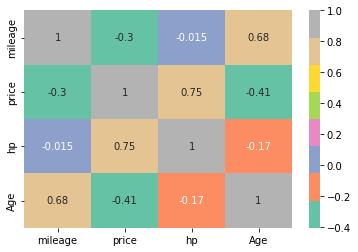

In [10]:
sns.heatmap(df.corr(), annot=True, cmap="Set2")
plt.show()

In [11]:
df.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
Age            int64
dtype: object

In [12]:
df.offerType.unique()

array(['Used', 'Demonstration', "Employee's car", 'Pre-registered', 'New'],
      dtype=object)

In [13]:
df.offerType.value_counts()

Used              39822
Pre-registered     2768
Demonstration      2351
Employee's car     1117
New                  13
Name: offerType, dtype: int64

In [14]:
#drop 'new'by filtering out value counts below as we have only afew data values
df = df.groupby("offerType").filter(lambda x: len(x) > 50)

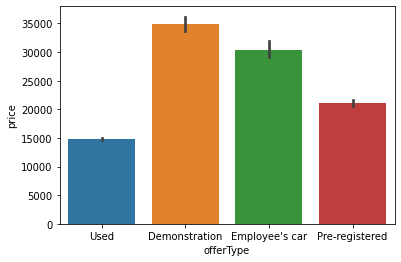

In [15]:
sns.barplot(x="offerType", y="price", data=df)
plt.show()

In [16]:
df.hp.describe()

count    46058.000000
mean       132.969538
std         74.991707
min          1.000000
25%         86.000000
50%        116.000000
75%        150.000000
max        850.000000
Name: hp, dtype: float64

In [17]:
#check for horsepower below 5 and drop
hp_drop = df[df.hp<5]
df.drop(hp_drop.index,inplace=True)

In [18]:
df.fuel.unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [19]:
#check for fuel with value counts above 50
df = df.groupby("fuel").filter(lambda x: len(x) > 50)

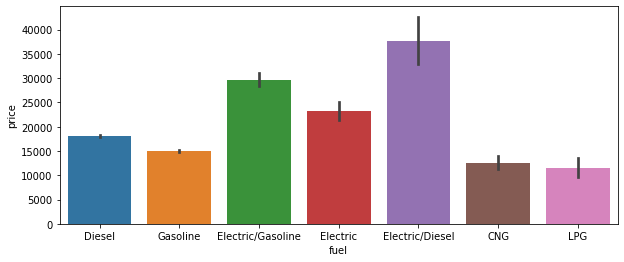

In [20]:
plt.subplots(figsize=(10,4))
sns.barplot(x="fuel", y="price", data=df)
plt.show()

In [21]:
df.gear.unique()

array(['Manual', 'Automatic', 'Semi-automatic'], dtype=object)

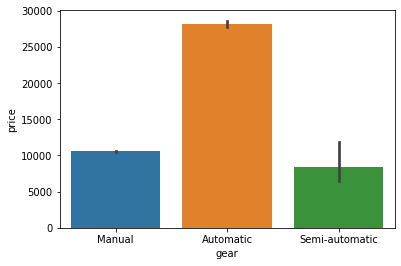

In [22]:
sns.barplot(x="gear", y="price", data=df)
plt.show()

In [23]:
#drop the make and model of car as 
df.drop(labels=['make','model'],axis= 1, inplace = True)

In [24]:
df.head()

,mileage,fuel,gear,offerType,price,hp,Age
0,235000,Diesel,Manual,Used,6800,116.0,11
1,92800,Gasoline,Manual,Used,6877,122.0,11
2,149300,Gasoline,Manual,Used,6900,160.0,11
3,96200,Gasoline,Manual,Used,6950,110.0,11
4,156000,Gasoline,Manual,Used,6950,156.0,11


In [25]:
df = pd.get_dummies(data = df,drop_first=True)

In [26]:
df.head()

,mileage,price,hp,Age,fuel_Diesel,fuel_Electric,fuel_Electric/Diesel,fuel_Electric/Gasoline,fuel_Gasoline,fuel_LPG,gear_Manual,gear_Semi-automatic,offerType_Employee's car,offerType_Pre-registered,offerType_Used
0,235000,6800,116.0,11,1,0,0,0,0,0,1,0,0,0,1
1,92800,6877,122.0,11,0,0,0,0,1,0,1,0,0,0,1
2,149300,6900,160.0,11,0,0,0,0,1,0,1,0,0,0,1
3,96200,6950,110.0,11,0,0,0,0,1,0,1,0,0,0,1
4,156000,6950,156.0,11,0,0,0,0,1,0,1,0,0,0,1


In [27]:
df.columns

Index(['mileage', 'price', 'hp', 'Age', 'fuel_Diesel', 'fuel_Electric',
       'fuel_Electric/Diesel', 'fuel_Electric/Gasoline', 'fuel_Gasoline',
       'fuel_LPG', 'gear_Manual', 'gear_Semi-automatic',
       'offerType_Employee's car', 'offerType_Pre-registered',
       'offerType_Used'],
      dtype='object')

In [28]:
df.rename(columns={'fuel_Electric/Diesel':'fuel_Electric_Diesel',\
           'fuel_Electric/Gasoline':'fuel_Electric_Gasoline',\
           "offerType_Employee's car":'offerType_Employee_car',\
           'offerType_Pre-registered':'offerType_Pre_registered',\
           'gear_Semi-automatic':'gear_Semi_automatic'})

,mileage,price,hp,Age,fuel_Diesel,fuel_Electric,fuel_Electric_Diesel,fuel_Electric_Gasoline,fuel_Gasoline,fuel_LPG,gear_Manual,gear_Semi_automatic,offerType_Employee_car,offerType_Pre_registered,offerType_Used
0,235000,6800,116.0,11,1,0,0,0,0,0,1,0,0,0,1
1,92800,6877,122.0,11,0,0,0,0,1,0,1,0,0,0,1
2,149300,6900,160.0,11,0,0,0,0,1,0,1,0,0,0,1
3,96200,6950,110.0,11,0,0,0,0,1,0,1,0,0,0,1
4,156000,6950,156.0,11,0,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46400,99,12990,71.0,1,0,0,0,1,0,0,1,0,0,1,0
46401,99,12990,71.0,1,0,0,0,1,0,0,1,0,0,1,0
46402,99,12990,71.0,1,0,0,0,1,0,0,1,0,0,1,0
46403,99,12990,71.0,1,0,0,0,1,0,0,1,0,0,1,0


In [29]:
df.head()

,mileage,price,hp,Age,fuel_Diesel,fuel_Electric,fuel_Electric/Diesel,fuel_Electric/Gasoline,fuel_Gasoline,fuel_LPG,gear_Manual,gear_Semi-automatic,offerType_Employee's car,offerType_Pre-registered,offerType_Used
0,235000,6800,116.0,11,1,0,0,0,0,0,1,0,0,0,1
1,92800,6877,122.0,11,0,0,0,0,1,0,1,0,0,0,1
2,149300,6900,160.0,11,0,0,0,0,1,0,1,0,0,0,1
3,96200,6950,110.0,11,0,0,0,0,1,0,1,0,0,0,1
4,156000,6950,156.0,11,0,0,0,0,1,0,1,0,0,0,1


In [30]:
X = df.drop('price',axis=1)

In [31]:
y=df.price

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

In [63]:
steps=[('scale',StandardScaler()),('model',LinearRegression())]

In [64]:
pipe=Pipeline(steps)
pipe

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [65]:
X = X.astype(float)

In [66]:
X.columns

Index(['mileage', 'hp', 'Age', 'fuel_Diesel', 'fuel_Electric',
       'fuel_Electric/Diesel', 'fuel_Electric/Gasoline', 'fuel_Gasoline',
       'fuel_LPG', 'gear_Manual', 'gear_Semi-automatic',
       'offerType_Employee's car', 'offerType_Pre-registered',
       'offerType_Used'],
      dtype='object')

In [67]:
#split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)
#fit model
pipe.fit(X_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [68]:
ypipe_train=pipe.predict(X_train)
ypipe_train[0:4]

array([ 8604.61717796,  8460.55561335, 13969.59435509, 77368.61938263])

In [69]:
print('The R-square is:', pipe.score(X_train, y_train))

The R-square is: 0.6147109751229874


In [70]:
ypipe_test=pipe.predict(X_test)
ypipe_test[0:4]

array([ 9120.90565041,  6804.21965019, 12266.65835745, 29299.39937683])

Text(0, 0.5, 'y_predicted')

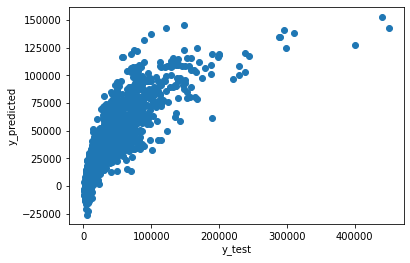

In [71]:
plt.scatter(y_test,ypipe_test)
plt.xlabel('y_test')
plt.ylabel('y_predicted')

In [42]:
print('The R-square is:', pipe.score(X_test, y_test))

The R-square is: 0.8318965865614936


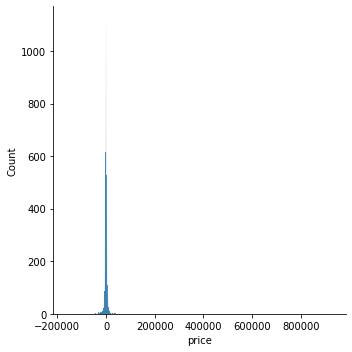

In [43]:
#sns.displot((y1_train-ypipe_train),hist = False)
sns.displot((y_train-ypipe_train))
plt.show()

In [44]:
import pickle

In [45]:
with open('regression_model.pkl','wb') as file:
    pickle.dump(pipe, file)

In [53]:
pickled_model=pickle.load(open('regression_model.pkl','rb'))

In [54]:
test=pickled_model.predict(X_test)
test[0:4]

array([ 9246.13947296,  7818.723526  , 12019.78351593, 29361.37171936])

In [58]:
ypipe_test==test

array([ True,  True,  True, ...,  True,  True,  True])